In [204]:
# *AZUN PRECIOUS EBITE*
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)

In [205]:
#now lets view 
strokedata = pd.read_csv('healthcare_stroke.csv')
strokedata.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [206]:
print(strokedata.shape)
print(strokedata.describe())

(5110, 12)
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.1

In [207]:
strokedata.stroke.unique()

array([1, 0], dtype=int64)

In [208]:
#exploring the datasets we can see there are missing values for the BMI but we can also check in this way: Precious is trying to make it easier.........
strokedata.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [209]:
#this means we have missing values for the bmi thus it is incomplete. so we have to fill this up using the median of the total numbers on bmi column: opps i got lost as NaN please find me
import numpy as np
strokedata.bmi.replace(to_replace=np.NaN, value=strokedata.bmi.mean(), inplace=True)
strokedata.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [210]:
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [211]:
#investigating the datas again we see that we have categorical features and machine understands numerical values only
#gender,ever_married,work_type,residence_type,smoking_status
strokedata.iloc[:1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [212]:
#now we have to investigate datas having only two states
strokedata.gender.unique(), strokedata.ever_married.unique(), strokedata.Residence_type.unique(),strokedata.work_type.unique(),strokedata.smoking_status.unique()

(array(['Male', 'Female', 'Other'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Urban', 'Rural'], dtype=object),
 array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object))

In [213]:
#lets view gender
strokedata.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [214]:
#our data has 'OTHER' in the gender section. so let's take this out guys by giving it to male since they are few: pity us.....lol
strokedata['gender'] = strokedata['gender'].replace('Other', 'Male')
strokedata.gender.value_counts()
strokedata.drop('id', axis=1,inplace=True)

#done! the rest are unique just like YOU!! Smiles

In [215]:
#from the above info we can see that these features are in categorical format... the computer understands numbers in this case.. lets turn abc to 123
#now we have to perform one hot encoding for all datas
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(strokedata['gender'])

In [216]:
ever_married=enc.fit_transform(strokedata['ever_married'])

In [217]:
work_type=enc.fit_transform(strokedata['work_type'])
Residence_type=enc.fit_transform(strokedata['Residence_type'])
smoking_status=enc.fit_transform(strokedata['smoking_status'])

In [218]:
#lets observe for a single column...lets take work type..................................
strokedata['smoking_status'] = smoking_status
strokedata['gender'] = gender
strokedata['work_type'] = work_type
strokedata['Residence_type'] = Residence_type
strokedata['ever_married'] = ever_married
strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


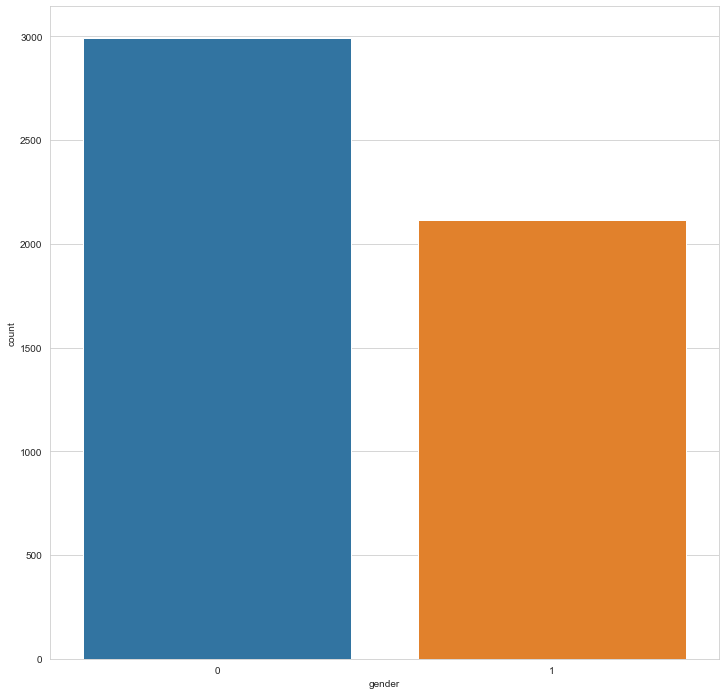

In [219]:
sns.set_style('whitegrid')
sns.countplot(x=strokedata['gender'], data=strokedata)
plt.show()

In [220]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'work_type'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>]],
      dtype=object)

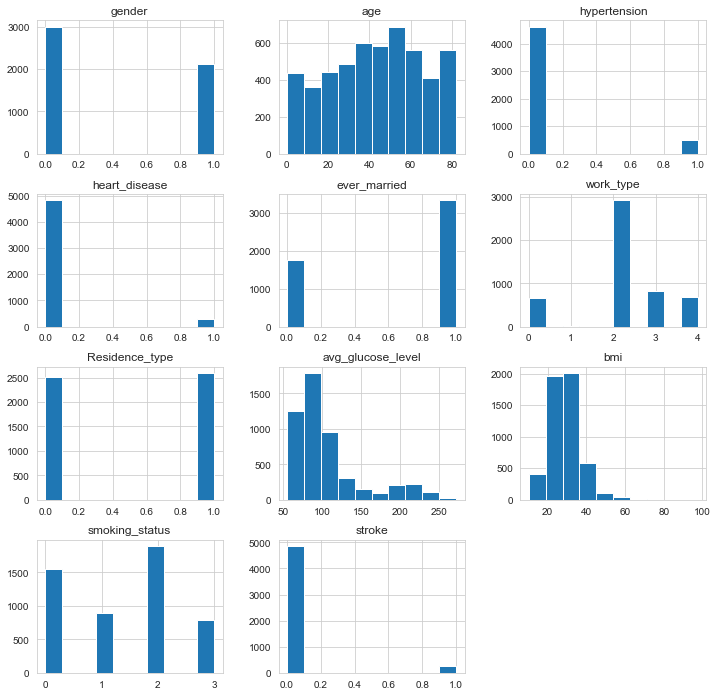

In [221]:
strokedata.hist()

partioning

In [222]:
X=strokedata.drop('stroke', axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [223]:
Y= strokedata.stroke
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [225]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [226]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [227]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

Nomarlize

In [228]:
strokedata.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414090,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.492612,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [229]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

In [230]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
X_train_std

array([[-0.83864971,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83864971,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19239295, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83864971,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19239295,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83864971,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [231]:
X_test_std

array([[-0.83864971, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83864971,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83864971,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83864971,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83864971,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19239295,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

Logistic Regression

In [232]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [233]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [234]:
Y_pred=lr.predict(X_test_std)
from sklearn.metrics import accuracy_score

In [235]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [236]:
ac_lr

0.9471624266144814

KNN

In [237]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [238]:
kn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [239]:
Y_pred=kn.predict(X_test_std)
ac_kn=accuracy_score(Y_test,Y_pred)

In [240]:
ac_kn

0.9452054794520548

Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [242]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [243]:
dt.feature_importances_

array([0.03337499, 0.18049605, 0.02541982, 0.01952323, 0.00924537,
       0.0329427 , 0.05745646, 0.32017161, 0.23988012, 0.08148966])

In [244]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

Looking at the important features that could lead to stroke with high values:

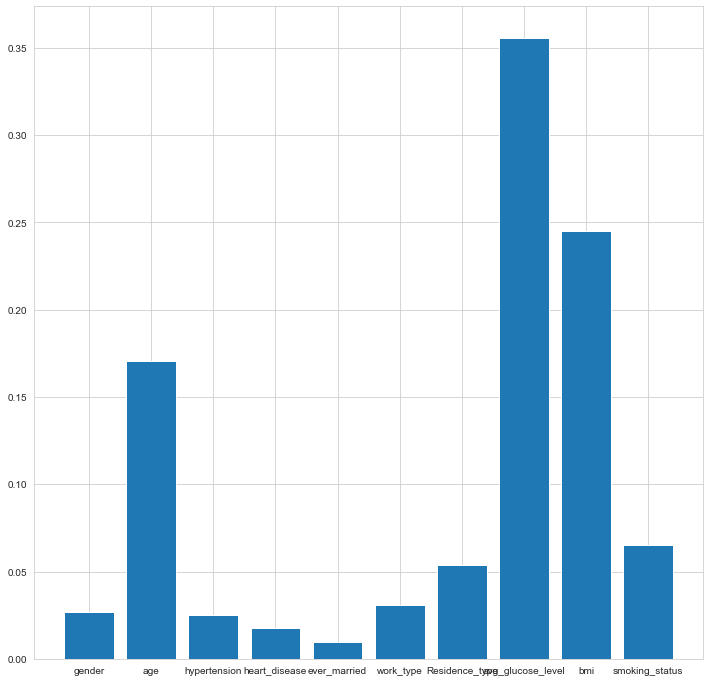

In [245]:
plt.bar(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'], [0.02664364, 0.17055075, 0.02532831, 0.01742903, 0.00942488,
       0.03069892, 0.05366126, 0.35594109, 0.24532105, 0.06500107])
plt.show()

In [246]:
Y_pred=dt.predict(X_test_std)

In [247]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [248]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [249]:
from sklearn.metrics import accuracy_score

In [250]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [251]:
ac_dt

0.9070450097847358

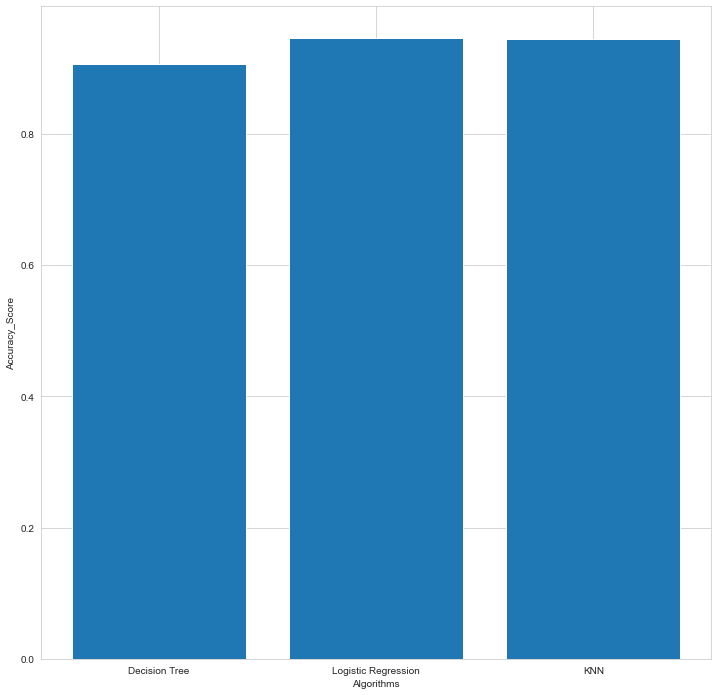

In [252]:
plt.bar(['Decision Tree','Logistic Regression','KNN'],[ac_dt,ac_lr,ac_kn])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy_Score')
plt.show()